### Install Required Libraries:

In [2]:
pip install nltk scikit-learn textblob

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



### Import Libraries:

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

### Load and Preprocess Data:

In [4]:
import pandas as pd

# Load the dataset from the CSV file
data_path = 'C:/Users/Sathish Kumar P.L/Downloads/rotten_tomatoes_reviews_sample.csv'
data = pd.read_csv(data_path)

# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess_text(Review):
    words = word_tokenize(Review)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

# Apply the preprocess_text function to the 'Review' column and create a new 'processed_text' column
data['processed_text'] = data['Review'].apply(preprocess_text)


### Feature Extraction:

In [5]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['processed_text'])

### Split the Data:

In [6]:
from sklearn.model_selection import train_test_split

# Assuming 'processed_text' is the column containing preprocessed text
X = data['Review']

# 'Freshness' is assumed to be the column containing the labels
y = data['Freshness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train a Sentiment Analysis Model:

In [7]:

# Create a pipeline with TF-IDF vectorizer and Multinomial Naive Bayes model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Fit the model to the training data
model.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

### Evaluate the Model:

In [13]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.731


### Sentiment Analysis with TextBlob:

In [15]:
data['sentiment'] = data['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

### Visualization:

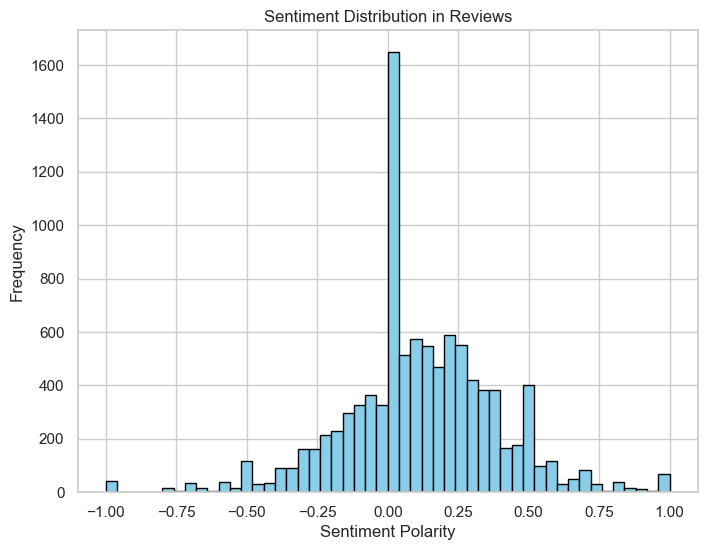

In [22]:
# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
plt.hist(data['sentiment'], bins=50, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution in Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [23]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:

import plotly.express as px

# Plotting an interactive histogram with plotly
fig = px.histogram(data, x='sentiment', nbins=50, title='Sentiment Distribution in Reviews')
fig.update_layout(xaxis_title='Sentiment Polarity', yaxis_title='Frequency', showlegend=False)
fig.show()


NameError: name 'data' is not defined

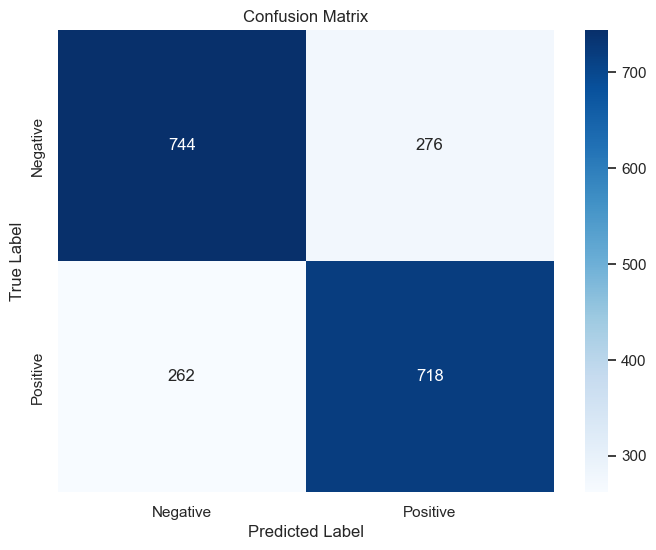

In [26]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()